## Week 3

Started level 4, but the code was rather unoptimized and ran slowly, so am not turning in that part(the code is commented
out). Feedback on level 1 and 2 is much appreciated, since I'm not completely sure it is correct.
Time spent on this exercise:
    - Level 1 and 2, maybe 3 or 4 hours, not including the 3 days of procrastinating.
    - Level 3 and started 4(think I'm finished with calculating Anne-Lise's expected time), 5 hours maybe.

### Level 1

    1.1.
        - For state representation you would only need current location, and view forward. How far forward
        would determine how far the agent could plan.
        - 1 minus for the location roughness, and a bouns at the end.
        - It's a finite MDP, you can only move in one direction, downwards and eventually you will get to the bottom.
        - It is an episodic task since you finish when you get to the bottom,
         it is not something you are contiously doing, like Week 1 exercise example.
    1.2
        - Since there is no probability involved when you are doing the action "go straight"
            p(s'(x+1,y)| s(x,y), "go straight) = 1
            p(s'(x+1,y+1)| s(x,y), "go straight) = 0
            p(s'(x+1,y-1)| s(x,y), "go straight) = 0
    1.3
        - I would not use a discount value here for since it is the total lap that counts, and we don't have any
        randomness or difficulty involved, e.g. if a more difficult path was faster, but you could fail and go slower.
        Then a discount would be more relevant I believe, when the action had uncertainty of result.
    1.4
        - 3^100, it is getting warm already.
    1.5
        - Maybe multiply the roughness value by the diagonal if you ar going left or right, roughness * 1.21.
        I'm unfortunatly not a geometer...


In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("../Data/the_hill.txt") as file:
    hill_txt = file.read()

hill = hill_txt.split('\n')
hill = np.asarray([np.asarray([float(x) for x in row.split('\t')]) for row in hill])

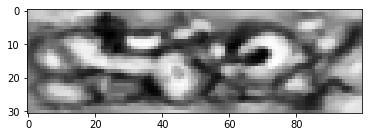

In [3]:
plt.imshow(hill, cmap='gray')

### Level 2

In [4]:
#Sum of sledding down the middle line(1- roughness) for each step
lars_time = np.sum([1-hill[15][x] for x in range(100)])
print('Lars reward: ' + str(lars_time))
print('Lars time: ' + str(100 - lars_time))

Lars reward: 41.05490049000001
Lars time: 58.94509950999999


Diagram for all states other than edges, row 0 and 30.

**Diagram was removed because it wouldn’t convert to pdf...**

In the edge cases Anne-Lise would have 2/3 of a chance of going towards the center of the course.



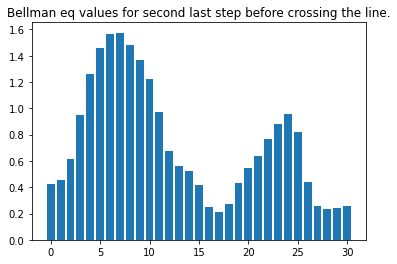

In [5]:
def anne_lise_bellmann_value_for_policy_loc(loc_x, loc_y):
    if loc_y == 0:
        values = sum([1/3 * (1-hill[loc_y + dy][loc_x+1]) for dy in [0, 0, 1]])
    elif loc_y == 30:
        values = sum([1/3 * (1-hill[loc_y + dy][loc_x+1]) for dy in [0, 0, -1]])
    else:
        values = sum([1/3 * (1-hill[loc_y + dy][loc_x+1]) for dy in range(-1, 2)])
    return values + 1 - hill[loc_y][loc_x]


v_s_100 = []


for i in range(31):
    v_s_100.append(anne_lise_bellmann_value_for_policy_loc(loc_x=98, loc_y=i))

plt.bar(range(31), v_s_100)
plt.title("Bellman eq values for second last step before crossing the line.")
plt.show()

As we can see from the bar graph the values match with the darker areas of the last column of
the image.

In [6]:
v_s =[v_s_100]
def next_step(y, x):
    if y == 0:
        values = [v_s[x][y+dy] for dy in [0, 0, 1]]
    elif y == 30:
        values = [v_s[x][y+dy] for dy in [0, 0, -1]]
    else:
        values = [v_s[x][y+dy] for dy in [0, -1, 1]]
    return values



for i in range(97, -1, -1):
    col = []
    for j in range(31):
        next_step_l = next_step(j, 97-i)
        col.append(1- hill[j, i] + np.mean(next_step_l))
    v_s.append(col)
print(f"Anne-Lise expected reward {v_s[len(v_s)-1][15]}")
print(f"Anne-Lise expected time {100 - v_s[len(v_s)-1][15]}")


Anne-Lise expected reward 47.69753501885055
Anne-Lise expected time 52.30246498114945


So the expected value for Anne-Lise is $\approx$ 48. I'm not sure i did the Bellman equation right,
so here is my thought process/calculations so you don't have to understand the code.

Start at last step with actions that give reward, column 99/i=98, and find the value of each Expected_value in
that column. So Expected_value[98][y] = Reward[98][y] + 1/3 * Reward[99][y-1] + 1/3 * Reward[99][y] + 1/3 * Reward[99][y+1],
and the fence cases taken into account, Reward[x][y] = 1-hill[x][y].
After that I work my way up the hill Expected_value[x][y] = Reward[x][y] + 1/3 * Expected_value[x+1][y-1] + 1/3 * Expected_value[x+1][y] +
                                                                             1/3 * Expected_value[x+1][y+1]


Since we are calculation each locations value just once we have a runtime of O(locations) in our case, if we
were to calculate all possible trajectories we would have to do 3^100, and since we did all possible starting points also
the equivalent to 31x3^100 = 1.59767031427e+49

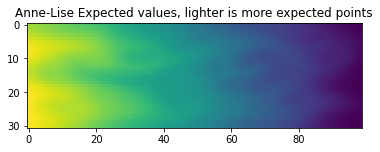

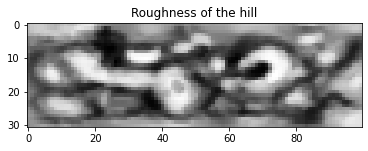

In [7]:
img =[[]]*31
for row_idx in range(31):
        img[row_idx] = [v_s[col_idx][row_idx] for col_idx in range(98, -1, -1)]
plt.title("Anne-Lise Expected values, lighter is more expected points")
plt.imshow(img)
plt.pause(0.01)
plt.title("Roughness of the hill")
plt.imshow(hill, cmap='gray')
print()

In [8]:
def best_bellmann_value_for_policy_loc(loc_x, loc_y):
    if loc_y == 0:
        values = max([1-hill[loc_y + dy][loc_x+1] for dy in [0, 0, 1]])
    elif loc_y == 30:
        values = max([1-hill[loc_y + dy][loc_x+1] for dy in [0, 0, -1]])
    else:
        values = max([1-hill[loc_y + dy][loc_x+1] for dy in range(-1, 2)])
    return values + 1 - hill[loc_y][loc_x]

v_s_star_100 = []
for i in range(31):
    v_s_star_100.append(best_bellmann_value_for_policy_loc(loc_x=98, loc_y=i))

v_s = [v_s_star_100]
for i in range(97, -1, -1):
    col = []
    for j in range(31):
        next_step_l = next_step(j, 97-i)
        col.append(1- hill[j, i] + max(next_step_l))
    v_s.append(col)

In [9]:
print("Max reward starting at the middle: " + str(v_s[len(v_s)-1][15]))
print("Best time starting at the middle: " + str(100 - v_s[len(v_s)-1][15]))

Max reward starting at the middle: 76.98039131199994
Best time starting at the middle: 23.019608688000062


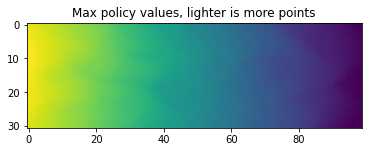

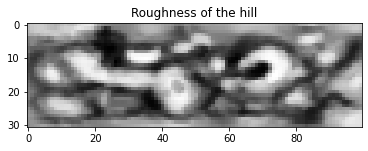

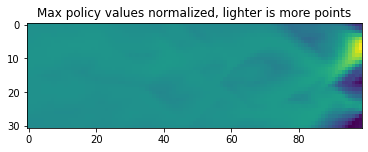

In [10]:
img =[[]]*31
for row_idx in range(31):
        img[row_idx] = [v_s[col_idx][row_idx] for col_idx in range(98, -1, -1)]
plt.title("Max policy values, lighter is more points")
plt.imshow(img)
plt.pause(0.01)
plt.title("Roughness of the hill")
plt.imshow(hill, cmap='gray')
plt.pause(0.01)

n_v_s = [v_s[i].copy() for i in range(len(v_s))]
for i in range(99):
    n_v_s[i] = np.asarray(n_v_s[i])
    n_v_s[i] = n_v_s[i]/np.linalg.norm(n_v_s[i])
n_v_s = np.asarray(n_v_s)
img =[[]]*31
for row_idx in range(31):
        img[row_idx] = [n_v_s[col_idx][row_idx] for col_idx in range(98, -1, -1)]
plt.title("Max policy values normalized, lighter is more points")
plt.imshow(img)

In [11]:
v_s.reverse()
def get_trajectory(start_y=15, start_x=0, trajectory = None ):
    if trajectory is None:
        trajectory = [(start_x, start_y)]
    m = 0
    m_idx = (0, 0)
    if start_x == len(v_s)-1:
        return
    if start_y == 0:
        next_step_dy = [0, 0, 1]
    elif start_y == 30:
        next_step_dy = [0, 0, -1]
    else:
        next_step_dy = [0, 1, -1]
    for dy in next_step_dy:
        if v_s[start_x+1][start_y+dy] > m:
            m = v_s[start_x+1][start_y+dy]
            m_idx = (start_x+1, start_y+dy)
    trajectory.append((m_idx[0], m_idx[1]))
    get_trajectory(m_idx[1], m_idx[0], trajectory)
    return trajectory

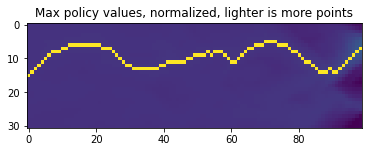

In [12]:
trajectory = np.asarray(get_trajectory())

for x, y in trajectory:
    n_v_s[98-x][y] = 1.0
img =[[]]*31
for row_idx in range(31):
        img[row_idx] = [n_v_s[col_idx][row_idx] for col_idx in range(98, -1, -1)]
plt.title("Max policy values, normalized, lighter is more points")
plt.imshow(img)
v_s = np.asarray(v_s)

This looks like the right trajectory, sorry for the visualisation, I'm surprised because I was not very
confident on the Bellman equations.

### Level 3

    - Agent state could be view of nearby locations or entire map, current location and orientation/new orientation.
    - The state space is 4*3000 different states since it it can be in each location and have four different orientations
    in each location.
    - The big problem here is that you can go in circles, so there is no guarantee that you will reach the finish, just
    keep on driving. Since you can visit the same location and state several times I would think there
    are infinite trajectories.

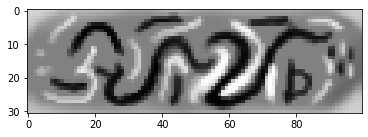

In [13]:
with open("../Data/the_backyard.txt") as file:
    backyard_txt = file.read()

backyard = backyard_txt.split('\n')
backyard = np.asarray([np.asarray([float(x) for x in row.split('\t')]) for row in backyard])

plt.imshow(backyard, cmap="gray")

### Level 4

**NOT FINISHED**

In [14]:
print("Lars time: " + str(sum(backyard[15])))


Lars time: 49.329414542999984


In [15]:
#One index for each state position
sm_v_s = np.array([np.array([np.array([0.0 for i in range(4)]) for j in range(31)]) for k in range(100)])
dir_values = {0: (0, -1), 1: (1, 0), 2: (0, 1), 3: (-1, 0)}

def move_value(x, y, param):
    if x + dir_values[param][0] < 0 or x + dir_values[param][0] > 99 or y + dir_values[param][1] < 0 or y + dir_values[param][1] > 30:
        return sm_v_s[x][y][param]
    return sm_v_s[x+dir_values[param][0]][y+dir_values[param][1]][param]

In [16]:

# theta = 0.1
# delta = 1
# while delta > theta:
#     delta = 0
#     for x in range(len(sm_v_s)-1, -1, -1):
#         for y in range(len(sm_v_s[x])):
#             for dir in range(len(sm_v_s[x][y])):
#                 if x != 99 or y != 15:
#                     v = sm_v_s[x][y][dir]
#                     sum_of_all_action_states_values = np.mean([move_value(x, y, (dir+direction)%4)
#                                                                 for direction in [1, 0, -1]])
#                     reward = backyard[y][x]
#                     sm_v_s[x][y][dir] = reward + sum_of_all_action_states_values
#                     delta = max(delta, abs(v - sm_v_s[x][y][dir]))
#
# print("Anne-Lise Expected time: " + str(sm_v_s[0][15][1]))
